In [1]:
import pandas as pd
df=pd.read_csv('Dataset/breast_cancer.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)

In [6]:
baseline_acc=acc
baseline_pred=y_pred

sens={}
for col in X_test.columns:
    perturbed=X_test.copy()
    perturbed[col]+=perturbed[col].std()
    pert_pred=model.predict(perturbed)
    pert_acc=accuracy_score(y_test,pert_pred)

    sens[col]=baseline_acc-pert_acc

for i in X.columns:
    if sens[i]==0.0:
        sens.pop(i)
print(sens)

{'concave points_mean': -0.00877192982456143, 'area_se': 0.00877192982456143, 'radius_worst': -0.00877192982456143, 'perimeter_worst': 0.00877192982456143, 'area_worst': -0.00877192982456143, 'concave points_worst': -0.00877192982456143}


In [7]:
sens_df=pd.DataFrame(list(sens.items()),columns=['Feature','Senstivity'])

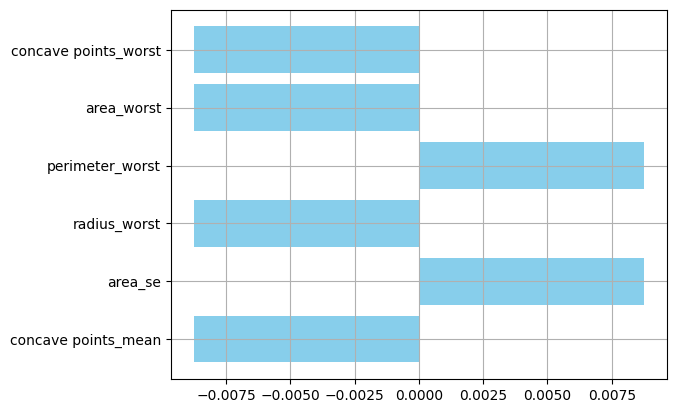

In [9]:
import matplotlib.pyplot as plt
plt.barh(sens_df['Feature'],sens_df['Senstivity'],color='skyblue')
plt.grid(True)

<BarContainer object of 5 artists>

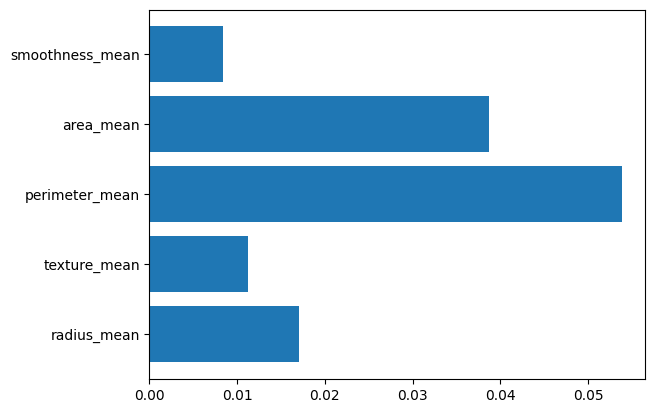

In [12]:
plt.barh(X.columns[:5],model.feature_importances_[:5]) # for only 5 features